<h1> 6. PyTorch를 이용하여 다중 선형 회귀 모델을 구현하려고 합니다. 아래의 순서를 따라서 완성해보세요. </h1>

In [ ]:
## 필요한 라이브러리 불러오기 ##
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim



## (1) x1 : 0.2부터 1까지의 실수 중 랜덤으로 100개 추출, x2 : 0.1부터 0.9까지의 실수 중 랜덤으로 100개 추출, x3 : 0.1부터 1까지의 실수 중 랜덤으로 100개 추출
## y : x1 + 2 * x2 + 2 * x3 + 2 + noise(random noise로 0부터 1까지의 실수 중 하나)

#### TODO  : Numpy로 선언하기 ########################
x1 = 
x2 = 
x3 = 
y = 

## (2) : 현재 x1, x2, x3, y의 형태를 Numpy에서 Tensor로 변환
#### TODO ########################
x = 
x = 
y = 

## x와 y의 크기 출력
print(x.shape, y.shape)

## Tensor 형태의 배열을 데이터셋으로 변환

## (3) : TensorDataset을 이용하여 텐서(Tensor)를 데이터셋(Dataset)으로 만들어주고, DataLoader에 사용하고자 하는 데이터셋 담기
## batch size는 32
from torch.utils.data import TensorDataset, DataLoader

## TODO ###########################
data_set =  ## Tensor를 Dataset으로 만들기
data_loader =  ## Dataloader에 사용하고자 하는 데이터셋 담기


## (4) : 모델 구축 과정 -> CustomLinearRegression 클래스에 모델 구축하기. 만들 모델은 입력층과 출력층 사이에 하나의 은닉층이 존재함. 
## 은닉층의 차원은 4이고, 활성화 함수로 sigmoid 사용 ###


### TODO ##########################
## 함수의 매개변수 형태는 바꾸셔도 됩니다. ex) def __init__(self, input_dim)
class CustomLinearRegression():
    def __init__(self, input_dim, hidden_dim, output_dim):
    def forward(self, x):
        return x

model = CustomLinearRegression() ## 모델 불러오기

## (5) : 모델 구축 후, optimizer와 learning rate 설정 및 학습 시작
## 에폭은 200회 반복, 10번마다 Loss값 출력
## Loss의 형태는 MSE

optimizer =  ## 적절한 optimizer 채워넣기기
n_epochs = 200

loss = []
for epoch in range(n_epochs + 1):
    ## TODO here ##

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost : {:.3f}'.format(epoch, n_epochs, cost.item()))



torch.Size([100, 3]) torch.Size([100])
Epoch    0/200 Cost : 28.351


<ipython-input-1-d88c71d98274>:46: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  cost = F.mse_loss(prediction, y_train)
<ipython-input-1-d88c71d98274>:46: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  cost = F.mse_loss(prediction, y_train)


Epoch   10/200 Cost : 16.006
Epoch   20/200 Cost : 12.765
Epoch   30/200 Cost : 12.594
Epoch   40/200 Cost : 5.976
Epoch   50/200 Cost : 7.513
Epoch   60/200 Cost : 7.199
Epoch   70/200 Cost : 1.830
Epoch   80/200 Cost : 3.724
Epoch   90/200 Cost : 2.748
Epoch  100/200 Cost : 1.352
Epoch  110/200 Cost : 1.078
Epoch  120/200 Cost : 0.701
Epoch  130/200 Cost : 0.471
Epoch  140/200 Cost : 0.784
Epoch  150/200 Cost : 0.953
Epoch  160/200 Cost : 0.168
Epoch  170/200 Cost : 1.364
Epoch  180/200 Cost : 0.338
Epoch  190/200 Cost : 1.071
Epoch  200/200 Cost : 0.273


<h1> 6번의 Loss값의 결과를 출력하는 과정입니다. </h1>

Text(0, 0.5, 'Loss')

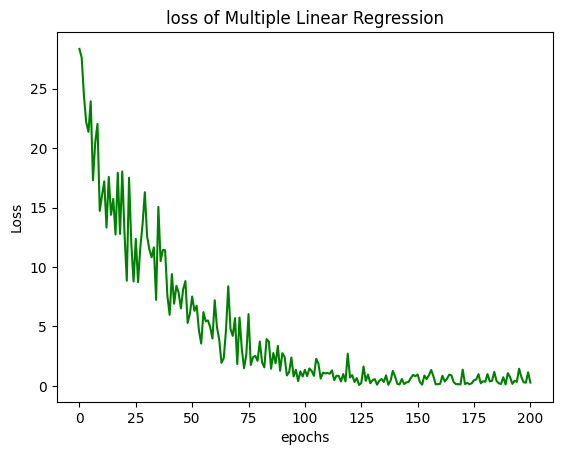

In [ ]:
import matplotlib.pyplot as plt


plt.plot(loss, 'g')
plt.title('loss of Multiple Linear Regression')
plt.xlabel('epochs')
plt.ylabel('Loss')

<h1> 7. PyTorch를 이용하여 MNIST 데이터에 있는 손글씨를 분류해보려고 합니다. 아래의 
순서를 따라서 완성해 보세요.</h1>

In [ ]:
import torchvision.datasets as dataset
import torchvision.transforms as transforms


device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777) ## 랜덤 시드 건들지 마세요!

if device == 'cuda':
    torch.cuda.manual_seed_all(777)

## MNIST 데이터 불러오기 
train_dataset = dataset.MNIST(root = 'MNIST_data/',
                             train = True, download = True, transform = transforms.ToTensor())

test_dataset = dataset.MNIST(root = 'MNIST_data', train = False, transform = transforms.ToTensor(), download = True)

## (1) : 불러온 train_dataset과 test_dataset을 dataloader에 담기.  batch size는 64
train_dataloader = DataLoader(dataset = train_dataset, batch_size = 64, shuffle = True, drop_last = True)
test_dataloader = DataLoader(dataset = test_dataset, batch_size = 16, shuffle = False)

100%|██████████| 9912422/9912422 [00:00<00:00, 133509666.62it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 97847894.85it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33918387.61it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21796943.67it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
## (2) : MLP에 해당하는 구조를 채워넣기기
class MLP(nn.Module):
    def __init__(self):
        ## TODO : 문제를 보고 해당하는 모델을 구축하여 넣으세요 ##

    def forward(self, x):
        
        return x


model = MLP() ## MLP 선언

## (3) : 학습하기. loss function은 crossentropyloss, 옵티마이저는 Adam으로 진행, train epoch은 20번번
criterion = 
optimizer = 

n_epochs = 20
for epoch in range(n_epochs):
   ## TODO here ##
    for X, Y in train_dataloader:

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.4f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 1.5978
Epoch: 0002 cost = 1.5239
Epoch: 0003 cost = 1.5084
Epoch: 0004 cost = 1.5000
Epoch: 0005 cost = 1.4945
Epoch: 0006 cost = 1.4915
Epoch: 0007 cost = 1.4873
Epoch: 0008 cost = 1.4851
Epoch: 0009 cost = 1.4828
Epoch: 0010 cost = 1.4811
Epoch: 0011 cost = 1.4796
Epoch: 0012 cost = 1.4792
Epoch: 0013 cost = 1.4777
Epoch: 0014 cost = 1.4771
Epoch: 0015 cost = 1.4771
Epoch: 0016 cost = 1.4760
Epoch: 0017 cost = 1.4745
Epoch: 0018 cost = 1.4762
Epoch: 0019 cost = 1.4738
Epoch: 0020 cost = 1.4734
Learning finished


In [ ]:
## (3) : 검증하는 단계 (test data를 이용해서 검증하기)
test_loss = 0.0

loss, correct = 0, 0
with torch.no_grad():
    for X, Y in test_dataloader:

print(f'Test Accuracy: {(100 * correct):>0.1f}%     Loss : {loss:>4f} \n')


Accuracy: 0.9757000207901001


<h3> 참고 링크 : https://tuttozurich.tistory.com/40 